<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting/blob/main/Sector_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import pytz
tz_NY = pytz.timezone('Asia/Kolkata')
datetime_NY = datetime.datetime.now(tz_NY)
print("Run date time (IST):", datetime_NY.strftime("%Y-%m-%d %H:%M:%S"))

gen_output = 0

Run date time (IST): 2024-02-07 16:24:32


In [2]:
# install libraries
!pip install yfinance
!pip install pandas-ta
#!pip install talib-binary

In [3]:
# import libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yfin
#import talib
yfin.pdr_override()
import pandas_ta as ta

from google.colab import data_table

In [4]:
# set start and end date
start_date = (datetime.date.today() + datetime.timedelta(days=-10*365)).strftime('%Y-%m-%d')
start1_date = (datetime.date.today() + datetime.timedelta(days=-1*365)).strftime('%Y-%m-%d')
end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')

In [5]:
# fetch nse indices scrips

import pandas as pd
import numpy as np

df_nse_sectors = pd.read_csv('https://raw.githubusercontent.com/ankit-rathi/Tradevesting/main/data/NSE_Sectors_Indices.csv')

In [6]:
sectors = df_nse_sectors['Sector'].unique()
df_sectors = pd.DataFrame()
for sector in sectors:
  stocks = df_nse_sectors[df_nse_sectors['Sector'] == sector]['Symbol'].values
  df_sector = pd.DataFrame()
  tweight = 0
  for stock in stocks:
    stock_df = yfin.Ticker(stock+'.NS').history(period='5y', interval='1d')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
    col = ['Close']
    stock_df = stock_df[col]
    stock_df['Split'] = 1
    weight = df_nse_sectors[df_nse_sectors['Symbol'] == stock]['Weight'].values[0]
    tweight = sum(df_nse_sectors[df_nse_sectors['Sector'] == sector]['Weight'].values)
    if stock == 'NESTLEIND':
      stock_df.loc[stock_df.index < '2024-01-01', 'Split'] = 10
    #stock_df[stock] = (stock_df[col]*weight)/(tweight*stock_df['Split'].values[0])
    stock_df[stock] = stock_df['Close']/stock_df['Split']
    col = [stock]
    stock_df = stock_df[col]
    df_sector = pd.concat([df_sector, stock_df], axis=1)

  df_sector[sector] = df_sector[stocks].sum(axis=1)
  col = [sector]
  df_sector = df_sector[col]
  df_sectors = pd.concat([df_sectors, df_sector], axis=1)
df_sectors

,AUTO,BANKS,FINANCE,IT,FMCG,PHARMA,MEDIA,METAL,INFRA,CHEMICAL,CEMENT,DURABLES,JEWELLERY,TEXTILES
Date,,,,,,,,,,,,,,
2019-02-07 00:00:00+05:30,13170.953339,3657.043854,3383.334553,5683.021179,6235.339017,7647.155914,913.757893,821.777836,8223.306377,3754.535751,22078.480652,4260.448380,1724.775650,1798.612698
2019-02-08 00:00:00+05:30,12946.641068,3658.932281,3381.788692,5634.629364,6067.225577,7596.691315,892.739445,796.890175,8121.037132,3714.390633,21967.373444,4231.042786,1715.568108,1829.576625
2019-02-11 00:00:00+05:30,12958.960403,3650.545258,3323.412537,5605.711456,6009.443788,7399.863708,940.481777,782.777153,7832.506203,3662.071548,21594.827881,4191.614166,1716.053856,1849.275494
2019-02-12 00:00:00+05:30,12851.483780,3627.102051,3290.089527,5564.588104,5905.718666,7441.369080,940.874928,802.653229,7847.359188,3651.365448,21456.259277,4097.728867,1722.996819,1855.109188
2019-02-14 00:00:00+05:30,12683.276077,3587.026962,3271.471283,5533.242279,5810.884042,7426.236450,975.721027,805.628521,7860.885616,3600.771034,21260.761292,4042.175095,1688.633568,1822.481989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01 00:00:00+05:30,27405.300415,6046.150024,9727.849792,14237.099884,12947.050262,17541.149780,3305.100029,5672.200027,26203.494354,18956.811111,44911.300476,18688.349731,4810.549957,5716.450001
2024-02-02 00:00:00+05:30,27695.750244,6009.800049,9870.249786,14550.500092,12971.450104,17643.349854,3294.999985,5751.749924,26540.123657,18897.695099,43868.449097,18827.449829,4794.299896,5708.149963
2024-02-05 00:00:00+05:30,27487.949768,5981.149963,9630.800217,14469.400177,12897.999939,17926.750244,3244.100014,5746.249985,26190.399765,18897.901398,42105.900391,18701.450226,4713.950043,5625.499893


In [7]:
def stock_prec_dev(stock_symbol):
    #stock_symbol = 'ULTRACEMCO.NS'
    short_window = 20
    mid_window = 50
    long_window = 200
    moving_avg = 'SMA'

    # import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-')))

    stock_df = df_sectors[[stock_symbol]]
    stock_df.columns = ['Close']

    stock_df = stock_df[(stock_df.index <= end_date) & (stock_df.index >= start_date)]
    stock_df['200_SMA'] = round(stock_df['Close'].rolling(window = 200, min_periods = 1).mean(),0)
    stock_df['Dev%_200'] = round((stock_df['Close'] - stock_df['200_SMA'])*100/stock_df['200_SMA'],2)
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows

    stock_df['Sector'] = stock_symbol

    stock_df['Close'] = round(stock_df['Close'],2)
    stock_df['Max'] = round(max(stock_df['Close']),2)
    stock_df = stock_df[(stock_df.index <= end_date) & (stock_df.index >= start1_date)]
    stock_df['Min'] = round(min(stock_df['Close']),2)
    #stock_df['Gained%'] = round((stock_df['Close'] - stock_df['Min'])*100/stock_df['Min'],2)
    stock_df.ta.rsi(append=True)
    #stock_df.rename(columns={'RSI_14':'RSI'}, inplace=True)
    #stock_df['Close'] = round(stock_df['Close'],0)
    stock_df['RSI_14'] = round(stock_df['RSI_14'],0)
    stock_df['ATH%'] = round((stock_df['Max'] - stock_df['Close'])*100/stock_df['Close'],2)
    #stock_df['Sector'] = stock_symbol
    stock_df = stock_df.tail(1)
    return stock_df

In [10]:
df_final =  pd.DataFrame()
for sector in sectors:

  df_tmp = stock_prec_dev(sector)
  df_final = df_final.append(df_tmp)
# all sectors
df_final = df_final.sort_values(by = 'ATH%', ascending=False)
#data_table.DataTable(df_final, include_index=False)
df_final

,Close,200_SMA,Dev%_200,Sector,Max,Min,RSI_14,ATH%
Date,,,,,,,,
2024-02-07 00:00:00+05:30,3284.95,3136.0,4.75,MEDIA,3808.40,1273.44,49.0,15.93
2024-02-07 00:00:00+05:30,14653.60,12880.0,13.77,IT,16403.73,10640.54,54.0,11.94
2024-02-07 00:00:00+05:30,9714.40,9506.0,2.19,FINANCE,10627.62,6955.03,42.0,9.40
2024-02-07 00:00:00+05:30,4738.70,4278.0,10.77,JEWELLERY,5101.70,3350.86,41.0,7.66
2024-02-07 00:00:00+05:30,5866.05,4762.0,23.18,METAL,6262.29,3173.78,70.0,6.75
2024-02-07 00:00:00+05:30,5989.05,5973.0,0.27,BANKS,6391.75,5339.05,43.0,6.72
2024-02-07 00:00:00+05:30,12946.50,11937.0,8.46,FMCG,13527.44,10048.88,50.0,4.49
2024-02-07 00:00:00+05:30,5716.25,5433.0,5.21,TEXTILES,5961.52,441.00,50.0,4.29
2024-02-07 00:00:00+05:30,19238.45,17621.0,9.18,CHEMICAL,19989.10,14512.17,52.0,3.90


<Axes: xlabel='Date'>

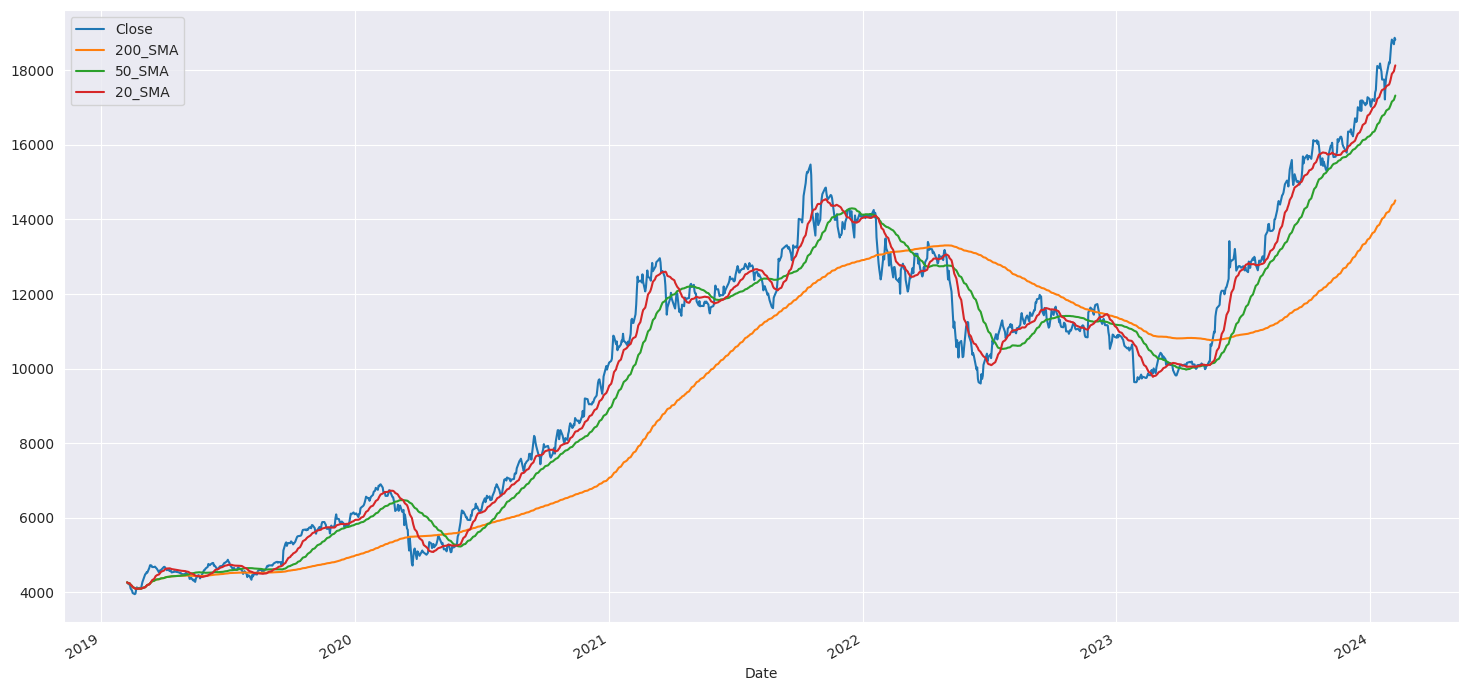

In [9]:
col = ['DURABLES']
sector_df = df_sectors[col]
sector_df.columns = ['Close']
sector_df['200_SMA'] = round(sector_df['Close'].rolling(window = 200, min_periods = 1).mean(),0)
sector_df['50_SMA'] = round(sector_df['Close'].rolling(window = 50, min_periods = 1).mean(),0)
sector_df['20_SMA'] = round(sector_df['Close'].rolling(window = 20, min_periods = 1).mean(),0)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
tmp_df = sector_df.reset_index()
tmp_df.plot(x='Date', y=['Close','200_SMA','50_SMA','20_SMA'], figsize=(18,9))